In [8]:
#•In this project, I used data on Google Play Apps and Reviews. 
#•I cleaned the data and plotted different variables against each other to see which factors are the most important 
#to make an app profitable.
#•I found these conclusions:
#    oThere is a straight vertical line in the Rating vs. Number of Reviews Plot, meaning that there is no 
#    relationship between these variables.
#    oThe Kernel Density Estimate shows the peak around 4.4/5.0, showing that most reviews are great. 
#    It is likely that poorly-rated apps leave the Market, making room for only high-quality apps.
#    oThere is no relationship between # of installs and # of reviews.
#    oThe plot of rating vs. price is bimodal-with one cluster near $0 and another around $400. Looks like all 
#    the $400 apps are above 3.0, indicating that most users of expensive apps get what they paid for. 
#    Whereas for free/cheap apps expected quality can vary anywhere from 1.0 to 5.0.
#    oCategory vs. Price plot shows that Finance, Lifestyle, and Family apps have a few that are 
#    expensive ~$400 unlike other categories, where the cost typically doesn’t exceed $25 (based on the view).
#    oI also zoomed in to see the category vs price for cheap apps under $100 to find that most apps are 
#    below $20 with a few under $40 and mostly none between $40 and $100.
#    oThe boxplot for Sentiment Polarity indicates there is a slightly higher sentiment towards paid apps 
#    than free apps. However, this is not enough to conclude a significant direction in polarity towards 
#    free or paid apps.
#    oFor sentiment analysis, sentiment polarity is average or positive for small size apps and strictly 
#    neutral for large size apps. This indicates a possible preference for small size apps but not necessarily 
#    a correlation.
#    oSentiment subjectivity follows a similar pattern, where for larger size apps, sentiment subjectivity 
#    hovers at a neutral level. This could indicate that those large size apps are necessities.
#•Overall, no factor alone is repsonsible for financial successful. But, a paid app indicates a higher level of quality.
# Perhaps this is one reason why the Bimodal plot of rating vs. price shows that most $400 apps received >3.0.
# Users do indeed have a greater preference for smaller size apps, but this isn't a leading factor in liking the app.

# Import App Data
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Eliminate duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print Total Number of apps
print('Total number of apps in the dataset = ', apps.size)

# Look at 10 random apps
n=10
apps.sample(n)

Total number of apps in the dataset =  135226


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4654,5635,DIRECTV,FAMILY,4.1,235486,63M,"10,000,000+",Free,0,Teen,Entertainment,"June 1, 2018",5.9.006,4.1 and up
8968,10129,EZ Inspections,PRODUCTIVITY,2.8,160,7.6M,"10,000+",Free,0,Everyone,Productivity,"July 27, 2018",4.5.24,4.2 and up
289,325,Manga AZ - Manga Comic Reader,COMICS,3.3,125,4.7M,"5,000+",Free,0,Teen,Comics,"July 24, 2018",1.0.4,4.0.3 and up
7337,8423,Bike Unchained,SPORTS,4.3,83545,23M,"5,000,000+",Free,0,Everyone,Sports,"July 31, 2018",1.193,4.0 and up
1527,1932,Shadow Fight 2,GAME,4.6,10979062,88M,"100,000,000+",Free,0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
5018,6011,BD Simplist Through Their Eyes,FAMILY,NaN,1,38M,10+,Free,0,Everyone,Simulation,"December 4, 2015",1.0,4.1 and up
6976,8041,Cathay Pacific,TRAVEL_AND_LOCAL,3.3,4069,50M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 25, 2018",6.6.1,4.3 and up
1741,2238,Video Editor,FAMILY,4.1,159619,23M,"5,000,000+",Free,0,Everyone,Video Players & Editors;Creativity,"July 17, 2018",6.14.091,4.3 and up
4065,5012,AE Order,TOOLS,4.1,19,0.317,"1,000+",Free,0,Everyone,Tools,"November 12, 2013",2.0.131112,2.3 and up
3478,4378,N Launcher: Nougat Theme,PERSONALIZATION,4.2,128,7.7M,"10,000+",Free,0,Everyone,Personalization,"June 13, 2017",1.0,4.1 and up


In [9]:
# Remove any extraneous characters:
chars_to_remove = ['+',',','M','$']
cols_to_clean = ['Installs','Size','Price']

# Loop for every column
for col in cols_to_clean:
    
    # Switch every character in every column col to an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric((apps[col]))

In [10]:
# Importing packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting text details for plot
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"


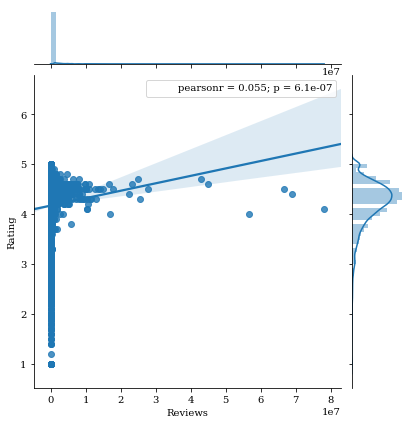

In [11]:
# Regression Plot of Number of Reviews vs Rating of Apps to see if users give more reviews to lower rated apps 
#in hopes the bugs will be fixed.
rat_v_reviews_plt = sns.jointplot(x = 'Reviews', y = 'Rating', data = apps, kind='reg')

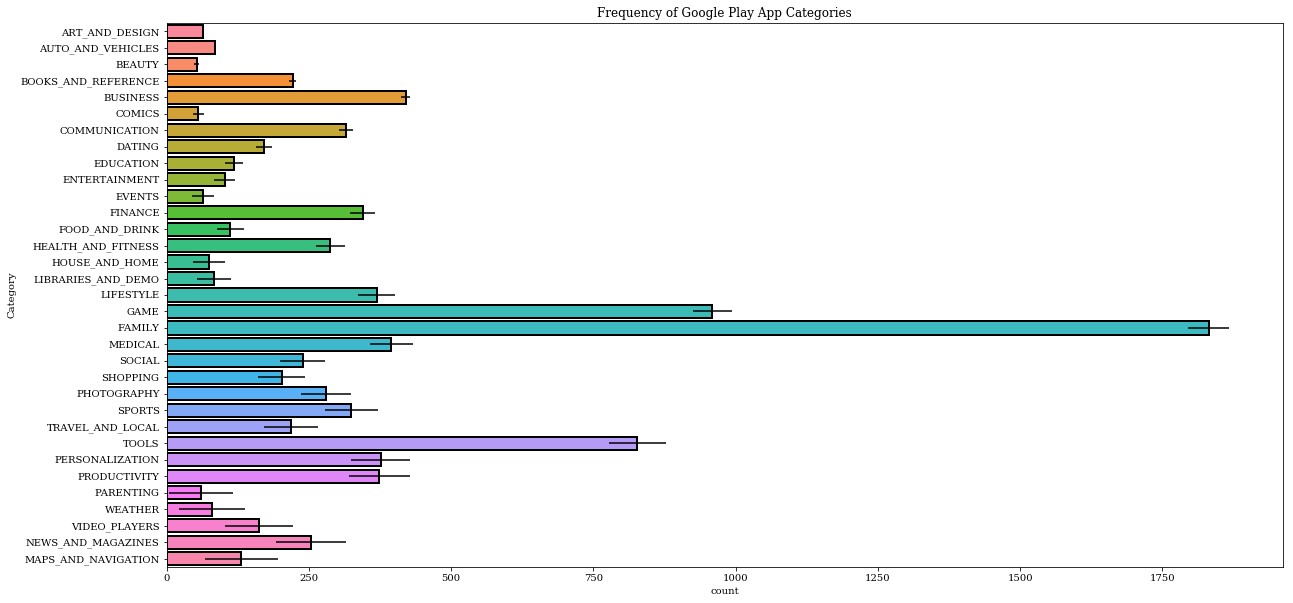

In [12]:

# Barplot of App Category to see Most/Least Common Categories

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

categories = set(apps['Category'])
num_categories = apps.Category.unique().size
p = sns.countplot(data=apps,
                  y = 'Category',
                  saturation=1,
                  xerr=2*np.arange(num_categories),
                 edgecolor=(0,0,0),
                linewidth=2)
p.set_title("Frequency of Google Play App Categories")

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


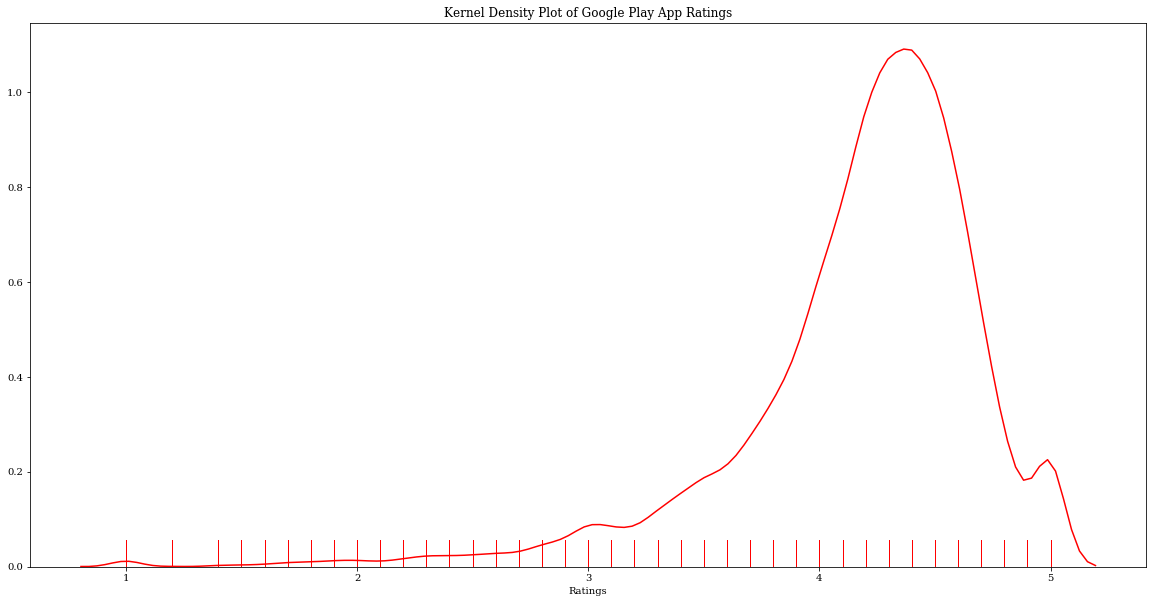

In [13]:
# Plotted a kernel density estimate and rug plot for Ratings

kde_ratings = sns.distplot(apps['Rating'], hist=False, rug=True, color="r", axlabel='Ratings')
kde_ratings.set_title("Kernel Density Plot of Google Play App Ratings")

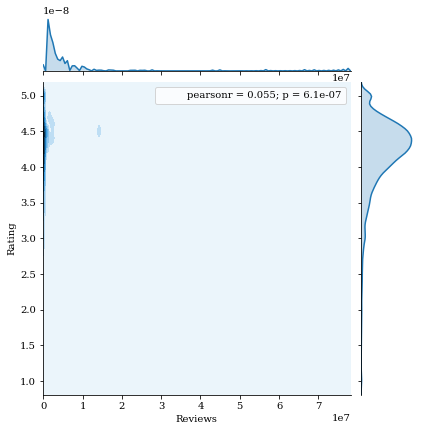

In [14]:
# Kernel Density Estimate Plot of Rating vs. Reviews
sns.jointplot(x='Reviews', y='Rating', data=apps, kind="kde");

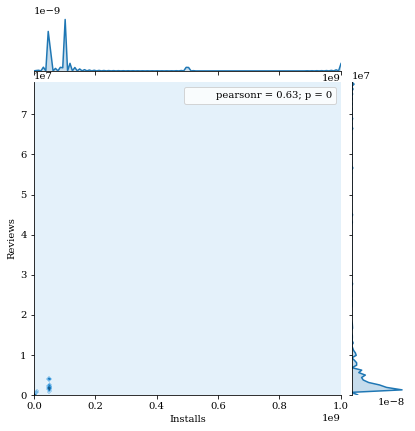

In [15]:
# Kernel Density Estimate Plot of Reviews vs. Installs
sns.jointplot(x='Installs', y='Reviews', data=apps, kind="kde");

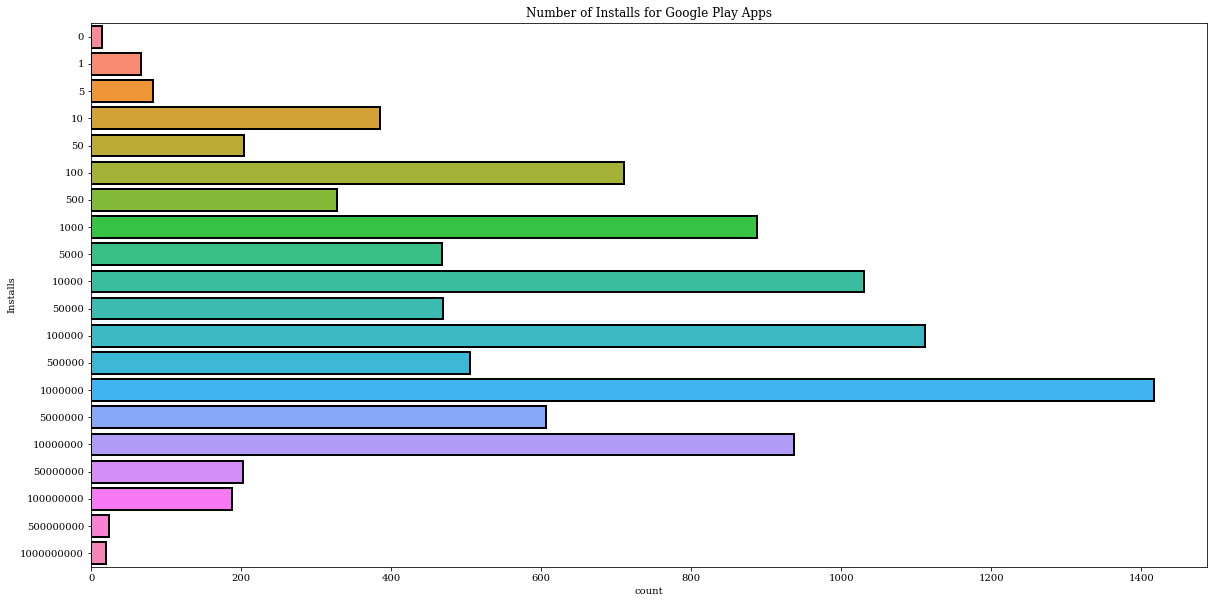

In [16]:
# Barplot of Number of Installs to see General Level of Popularity Among Google Play Apps
categories = set(apps['Installs'])
num_categories = apps.Category.unique().size
p = sns.countplot(data=apps,
                  y = 'Installs',
                  saturation=1,
                 edgecolor=(0,0,0),
                linewidth=2)
p.set_title("Number of Installs for Google Play Apps")

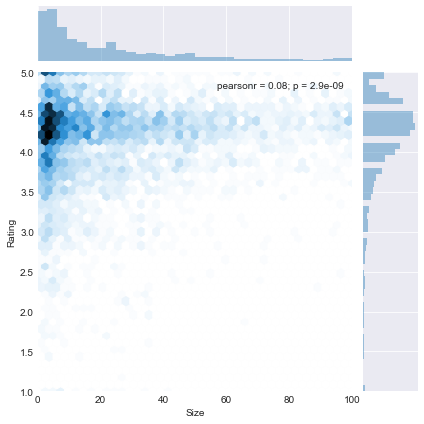

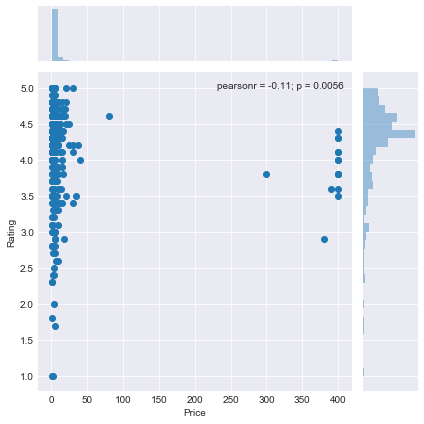

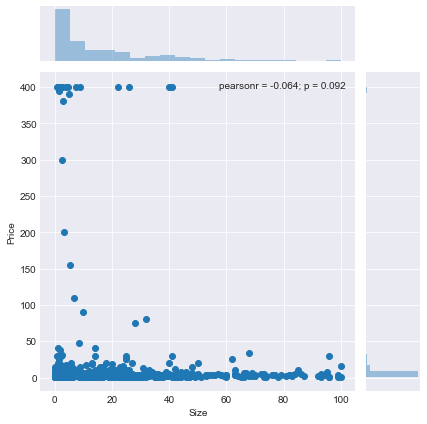

In [17]:
# Wanted to see the relationship between 
# Hexbin is useful to plot large datasets since it subsets portions of the plot into hexbins based on similar values.

%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset to only categories that have >=250 apps 
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot of Size vs. Rating
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')


# Subset only apps that are paid, the graph Price vs. Rating
paid_apps = apps[apps['Type']=='Paid']

plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

# Plot Size vs. Price
plt2 = sns.jointplot(x = 'Size', y = 'Price', data = paid_apps)

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.

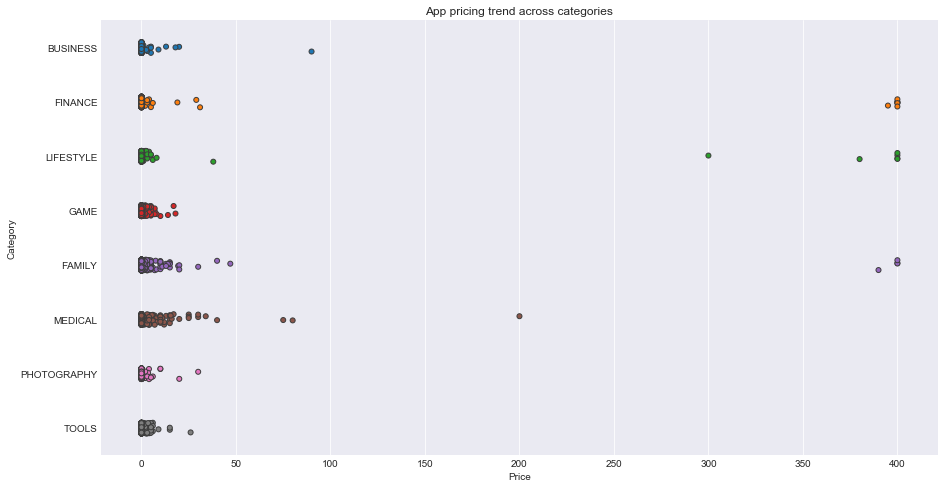

In [18]:
# Strip plot allows me to plot a categorical variable against a continuous one.

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select some popular categories of apps 
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Analyze trend of price for category subset
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps >$200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
print(apps_above_200)

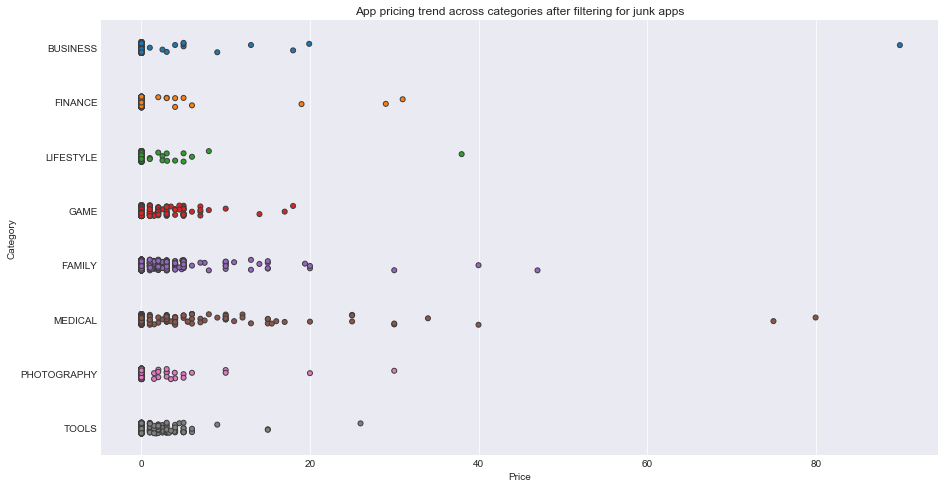

In [19]:
# Choose apps <$100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Analyze price vs category for authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

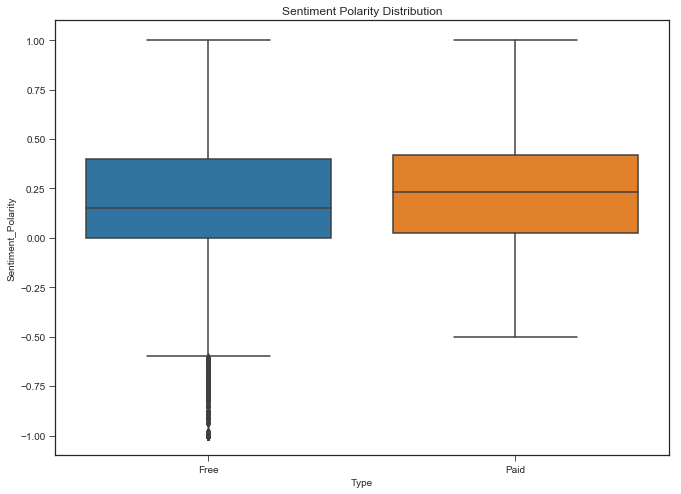

In [20]:
# Import user_reviews.csv
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Eliminate NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User reviews sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

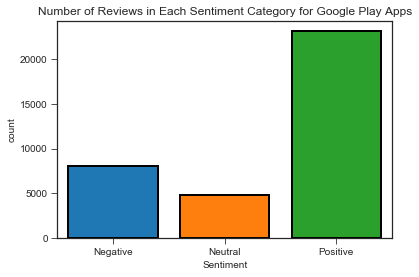

In [21]:
# Graphing the Sentiment Categories of the App Reviews: Most App Reviews are positive

categories = set(merged_df['Sentiment'])
num_categories = apps.Category.unique().size
p = sns.countplot(data=merged_df,
                  x = 'Sentiment',
                  saturation=1,
                 edgecolor=(0,0,0),
                linewidth=2)
p.set_title("Number of Reviews in Each Sentiment Category for Google Play Apps")

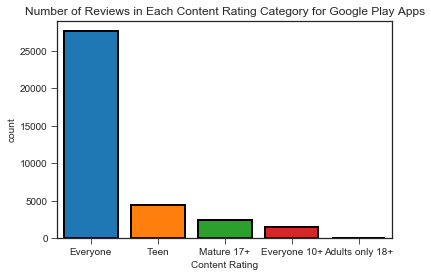

In [22]:
# Barplot of Content Rating of Apps: Most apps are inclusive of all age groups.
categories = set(merged_df['Content Rating'])
num_categories = apps.Category.unique().size
p = sns.countplot(data=merged_df,
                  x = 'Content Rating',
                  saturation=1,
                 edgecolor=(0,0,0),
                linewidth=2)
p.set_title("Number of Reviews in Each Content Rating Category for Google Play Apps")

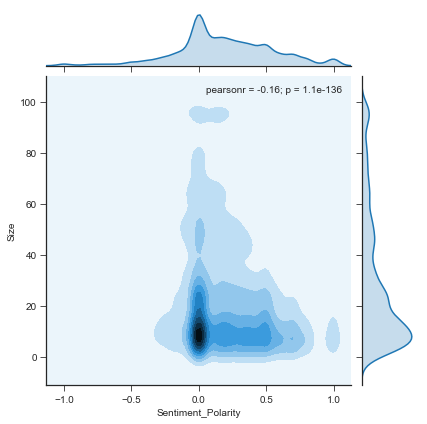

In [33]:
# Plotting Sentiment Polarity vs Size of App to analyze further how people feel about app size.
sent_pol_vs_size_plt = sns.jointplot(x = 'Sentiment_Polarity', y = 'Size', data = merged_df, kind='kde')

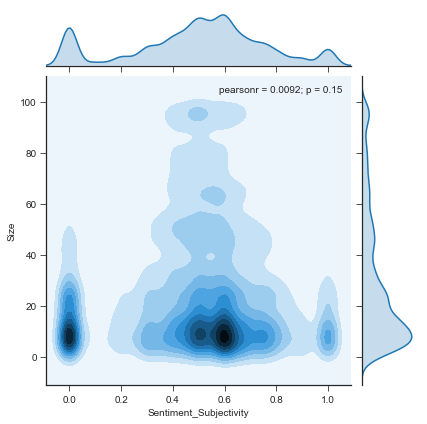

In [32]:
# Plotting Sentiment Subjectivity vs Size of App to analyze further how people feel about app size.
sent_pol_vs_size_plt = sns.jointplot(x = 'Sentiment_Subjectivity', y = 'Size', data = merged_df, kind='kde')
#•Sources: Google Play Website, Datacamp